In [146]:
from numpy import loadtxt
import string
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from PIL import Image, ImageOps
import glob
size = (256, 256)

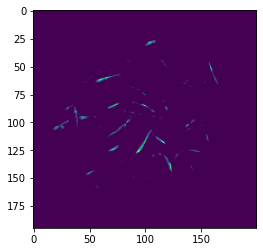

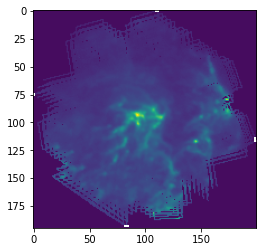

In [3]:
file = 'SUPRHT\OUTPUT\G130.37+11.26_500__SUPRHT_K21_BAR3.fits'
dat = fits.open (file)
m = dat[0].data
plt.imshow (m)
fig = plt.figure ()
file_orig = 'cc_fil\Herschel_data-20210927T210244Z-001\Herschel_data\maps\G130.37+11.26_500_.fits'
dat = fits.open (file_orig)
m = dat[0].data
plt.imshow (m)

In [ ]:

file = 'cc_fil/Herschel_data-20210927T210244Z-001/Herschel_data/maps/v31_8665_500_.fits'
dat = fits.open (file)
images = [f for f in glob.glob("cc_fil/Herschel_data-20210927T210244Z-001/Herschel_data/maps/*.fits")]
for index, image in enumerate (images): 
    im = fits.open(image)
    m = im[0].data
    plt.imshow (m)
    file = image.split ('.fits')[0] + '.jpg'
    file = file.replace ('\\','/')
    plt.savefig(file)
    #print (file)
    #save_image (m, size, file)


In [56]:
ks = 7
bw = 3
file = 'cc_fil/Herschel_data-20210927T210244Z-001/Herschel_data/maps/G130.37+11.26_500_.fits'
rht_output (ks, bw, file)

cc_fil/Herschel_data-20210927T210244Z-001/Herschel_data/maps/G130.37+11.26_500_.fits
Generating Kernel with arguments: kernel size = 7, bar width = 3, sub-pixel number = 101, sub-angle number  = 180 :
 [=================== ] 99%
Kernel ready!
SUPRHT/kernel_supRHT_K7_B3_Nd101_Nt180.fits
SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  180                                                  
NAXIS2  =                    7                                                  
NAXIS3  =                    7                                                  
KERNSIZE=                    7 / Size of the kernel's side                      
BARWIDTH=                    3 / Width of Kernel Bar                            
NDRIZZ  =                  101 / Number of sub-pixels/line in 1 p

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [=======             ] 37%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [===========         ] 59%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [================    ] 82%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [====================] 100%
Computing...
Files succesfully saved:	SUPERHT.fits	SUPERHT_THETA.fits	SUPERHT_SIGTHETA.fits	


0.0


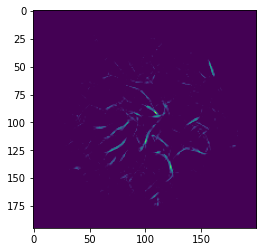

In [76]:
#path = 'SUPRHT/OUTPUT/v31_8665_500__SUPRHT_K15_BAR3.fits'
path = 'SUPRHT/OUTPUT3/G130.37+11.26_500__SUPRHT_K13_BAR1.fits'
arr = pyfits.getdata(path)
print (arr.min ())
plt.imshow (arr)
#dat = fits.open (path)
#im = dat[0].data
#plt.imshow (im, vmin = -10)

In [153]:
import os
file = 'cc_fil/Herschel_data-20210927T210244Z-001/Herschel_data/maps/v31_8665_500_.fits'
dat = fits.open (file)
images = [f for f in glob.glob("cc_fil/Herschel_data-20210927T210244Z-001/Herschel_data/maps/*.fits")]
files = []
origin = []
images_all = []
masks_all = []
pil_all =  []
newSize = (256,256)
for index, image in enumerate (images): 
    #im = fits.open(image)
    im = pyfits.getdata(image)
    print (im.shape)
    #m = im[0].data
    origin.append (m)
    file = image.replace ('\\','/')
    file = file.split ('/')[-1]
    file = file [:-5]
    files.append (file)
    
    #print (file)
for i,file in enumerate (files):
    file = 'SUPRHT/OUTPUT/' + file + '_SUPRHT_K21_BAR3.fits'
    if (os.path.exists (file)):
        im = pyfits.getdata(file)
        #im = fits.open(file)
        #m = im[0].data
        #plt.imshow (m)
        image_f = resize_image (origin[i], newSize, False)
        mask = resize_image (im, (256,256), True)
        cnt = 0
        #for i in range (256):
        #    for j in range (256):
        #        if (mask[i][j] > 0):
        #            cnt  = cnt + 1
        #            mask[i][j] = 1
        mask = mask.tolist()
        masks_all.append (mask)
        #stacked_img = np.stack((image_f,)*3, axis=-1)
        #images_all.append (stacked_img.tolist())
        #stacked_img = np.stack((image_f,)*3, axis=-1)
        #images_all.append (stacked_img.tolist())    
        images_all.append (image_f)
        print (i)

(868, 802)
(530, 492)
(456, 435)
(277, 263)
(199, 188)
(1375, 1344)
(833, 815)
(524, 491)
(318, 296)
(228, 212)
(1628, 1596)
(984, 965)
(599, 574)
(363, 345)
(259, 247)
(867, 779)
(530, 478)
(443, 414)
(269, 249)
(193, 179)
(1849, 1822)
(1109, 1100)
(675, 642)
(408, 386)
(292, 276)
(793, 801)
(485, 491)
(429, 451)
(259, 275)
(186, 197)
(1024, 1007)
(624, 612)
(444, 432)
(272, 261)
(194, 188)
(1628, 1591)
(984, 962)
(594, 572)
(360, 344)
(257, 246)
(1593, 1558)
(962, 943)
(609, 584)
(368, 352)
(263, 252)
(1531, 1496)
(926, 904)
(554, 571)
(337, 345)
(240, 249)
(1534, 1502)
(928, 907)
(550, 568)
(334, 343)
(239, 247)
(1046, 1025)
(636, 625)
(442, 430)
(269, 259)
(193, 185)
(1124, 1092)
(683, 665)
(442, 424)
(270, 256)
(192, 182)
(1041, 1067)
(634, 649)
(448, 442)
(275, 266)
(197, 192)
(1520, 1492)
(920, 902)
(663, 631)
(404, 380)
(288, 273)
(1078, 1102)
(656, 670)
(447, 457)
(272, 276)
(195, 200)
(1088, 1053)
(662, 640)
(448, 443)
(275, 268)
(196, 192)
(1383, 1333)
(838, 809)
(492, 507)


In [72]:
!pip install pyfits

  Created wheel for pyfits: filename=pyfits-3.5-cp38-cp38-win_amd64.whl size=484347 sha256=5e1a82e904e170461448a05a74b5e50162e8364ba687d38f0a465d04e5fbe786
  Stored in directory: c:\users\nu\appdata\local\pip\cache\wheels\a4\b5\c1\0da5f7a697b3df608a74e780feb244b6f4230c4291f8df237b
Successfully built pyfits


You should consider upgrading via the 'c:\users\nu\anaconda3\python.exe -m pip install --upgrade pip' command.


255.0
(256, 256)


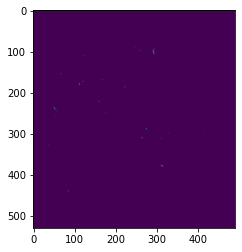

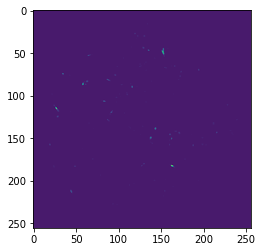

In [152]:
import pyfits
file = 'SUPRHT/OUTPUT/' + files[1] + '_SUPRHT_K21_BAR3.fits'
plt.figure(0)
im = fits.open(file)
m = im[0].data
plt.imshow (m)
#arr = np.array (origin [1])
#print ('max:', arr.max(), 'min:',arr.min())
#print (arr.shape)
#plt.imshow (masks_all [1])
plt.figure (1)
f = np.array (images_all [1])
print (f.max())
plt.imshow (images_all[33])
m = np.array (masks_all [33])
print (m.shape)

In [24]:
def rht_output (ks, bw, filename_I):
    ndrizz = 101
    ntheta = 180
    Dict_size = 1
    N_ideal_bars = 10000
    smooth_rad_bitmap = bw
    sigma_gauss_edge_smooth = smooth_rad_bitmap + 0
    kernel_file = 'SUPRHT/'+ 'kernel_supRHT_K{}_B{}_Nd{}_Nt{}.fits'.format(ks, bw, ndrizz, ntheta)  #kernel_path + 'kernel_supRHT_K{}_B{}_Nd{}_Nt{}.fits'.format(ks, bw, ndrizz, ntheta)
    sigma_file =  'SUPRHT/' + 'map'+'_sigma_K{}_B{}_Nd{}_Nt{}_NBI{}.fits'.format(ks, bw, ndrizz, ntheta, N_ideal_bars) #sigma_path + 'map'+'_sigma_K{}_B{}_Nd{}_Nt{}_NBI{}.fits'.format(ks, bw, ndrizz, ntheta, N_ideal_bars)
    output_path = 'SUPRHT/OUTPUT3/'
    histogram_fraction = 0.75
    print (filename_I)
    RHT_output = suprht.main(filename_I, kernel_file, ks, bw, ndrizz, ntheta, histogram_fraction, sigma_gauss_edge_smooth, smooth_rad_bitmap, output_path)


In [ ]:
if __name__ == '__main__':
    ks = 21
    bw = 3
    images = [f for f in glob.glob("cc_fil/Herschel_data-20210927T210244Z-001/Herschel_data/maps/*.fits")]
    from multiprocessing import Process
    ks = [ks] * len(images)
    bw = [bw] * len (images)
    p = Process(target=rht_output, args=((ks, bw, images)))
    p.start()
    p.join()
#for index, image in enumerate (images): 
    #im = fits.open(image)
    #m = im[0].data
    #rht_output (ks, bw, image)
    #plt.imshow (m)
    #file = image.split ('.fits')[0] + '.jpg'
    #file = file.replace ('\\','/')
    #plt.savefig(file)

In [6]:
ks = 15
bw = 3
images = [f for f in glob.glob("cc_fil/Herschel_data-20210927T210244Z-001/Herschel_data/maps/*.fits")]

for index, image in enumerate (images): 
    im = fits.open(image)
    print (image)
    m = im[0].data
    #print (m.shape)
    if (m.shape[0] <= 600 and m.shape [1] <= 600):
        rht_output (ks, bw, image)
    #plt.imshow (m)
    #file = image.split ('.fits')[0] + '.jpg'
    #file = file.replace ('\\','/')
    #plt.savefig(file)

cc_fil/Herschel_data-20210927T210244Z-001/Herschel_data/maps\G0.02+18.02_100_.fits
cc_fil/Herschel_data-20210927T210244Z-001/Herschel_data/maps\G0.02+18.02_160_.fits
cc_fil/Herschel_data-20210927T210244Z-001/Herschel_data/maps\G0.02+18.02_160_.fits
Generating Kernel with arguments: kernel size = 15, bar width = 3, sub-pixel number = 101, sub-angle number  = 180 :
 [=================== ] 99%
Kernel ready!
SUPRHT/kernel_supRHT_K15_B3_Nd101_Nt180.fits
SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  180                                                  
NAXIS2  =                   15                                                  
NAXIS3  =                   15                                                  
KERNSIZE=                   15 / Size of the kernel's side   

value: 8.5 483.5 8.5
Rolling Hough Transform in progress...
 [                    ] 2%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [=                   ] 5%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [===                 ] 17%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [====                ] 20%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [====                ] 23%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [=====               ] 26%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [=====               ] 29%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [======              ] 32%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [======              ] 34%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [=======             ] 37%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [========            ] 40%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [========            ] 43%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [=========           ] 46%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [=========           ] 48%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [==========          ] 51%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [==========          ] 54%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [===========         ] 58%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [============        ] 61%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [============        ] 64%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [=============       ] 66%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [==============      ] 70%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [==============      ] 73%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [===============     ] 76%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [===============     ] 79%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [================    ] 81%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [================    ] 84%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [=================   ] 87%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [==================  ] 90%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [==================  ] 93%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [=================== ] 95%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [=================== ] 98%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [====================] 100%
Computing...


C:\Users\NU\Documents\dana_collaboration_project\suprht.py:230: RuntimeWarning: invalid value encountered in true_divide
  sigtheta = np.sqrt((QNRHT**2 * UNRHTsq +  UNRHT**2 * QNRHTsq) / (4 * (QNRHT**2 + UNRHT**2)**2.) )*180/np.pi


FileNotFoundError: [Errno 2] No such file or directory: 'SUPRHT/OUTPUT2/maps\\G0.02+18.02_160__SUPRHT_THETA_K15_BAR3.fits'

In [99]:
from numpy import loadtxt
import string
import sys
import numpy as np, cv2
sys.path.append('/home/adai/dana_collaboration_project')
import suprht
#import RHT_tools
from astropy.io import fits
import os.path
import matplotlib.pyplot as plt

import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
from numpy import savetxt


In [100]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [101]:
info = {
    "description": "Interstellar Medium Dataset",
    "url": "",
    "version": "1.0",
    "year": 2020,
    "contributor": "NU",
    "date_created": "2020/11/05"
}

In [102]:
from typing import List, Tuple, Union


def shape(ndarray: Union[List, float]) -> Tuple[int, ...]:
    if isinstance(ndarray, list):
        # More dimensions, so make a recursive call
        outermost_size = len(ndarray)
        row_shape = shape(ndarray[0])
        return (outermost_size, *row_shape)
    else:
        # No more dimensions, so we're done
        return ()

In [18]:
import os
import glob
from matplotlib import cm
from PIL import Image, ImageOps
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

In [54]:
def save_image (image, newSize, file, grayscale = False):
    image_d = Image.fromarray(image)
    image_p = image_d.resize(newSize)
    if (grayscale == True):
        image_p = ImageOps.grayscale(image_p)
    image_f = np.array (image_p)
    image_f = (image_f / image_f.max()) * 255
    stacked_img = np.stack((image_f,)*3, axis=-1).astype(np.uint8)
    print (stacked_img.shape)
    image_d = Image.fromarray(stacked_img)
    image_d.save (file)

In [147]:
def resize_image (image, newSize, grayscale = False):
    image_d = Image.fromarray(image)
    image_p = image_d.resize(newSize)
    if (grayscale == True):
        image_p = ImageOps.grayscale(image_p)
    image_f = np.array (image_p)
    image_f = (image_f / image_f.max()) * 255
    return image_f

In [ ]:
from os.path import dirname, join as pjoin
import scipy.io as sio
from scipy.io import readsav
file1 = 'cc_fil/ellipses1/ellipses_maps_N1000.fits'
file2 = 'cc_fil/ellipses1/ellipses_masks_N1000.fits'
dataset_x = fits.open(file1)
dataset_y = fits.open(file2)
dataset_x = dataset_x[0].data
dataset_y = dataset_y[0].data
plt.figure(1)
#dataset_x = np.array (dataset_x)
#dataset_y = np.array (dataset_y)
print (dataset_x[0].shape)
plt.imshow(dataset_x[0])
plt.axis('off')
#images_all = dataset_x
#masks_all = dataset_y

In [11]:
from PIL import Image, ImageOps
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

images_list = [f for f in glob.glob("cc_fil/BEST/*_I_*")]
mask_list = [f for f in glob.glob("cc_fil/BEST/*_M_*")]
images_list2 = []
mask_list2 = []
print (len (images_list))
images_list2 = [f for f in glob.glob("cc_fil/BEST2/*_I_*")]
mask_list2 = [f for f in glob.glob("cc_fil/BEST2/*_M_*")]
print (len  (images_list2) )

387
3498


In [12]:
import os
import glob
from matplotlib import cm
images_list.extend (images_list2)
mask_list.extend (mask_list2)
print (len (mask_list))
images_all = []
masks_all = []
pil_all =  []
newSize = (256,256)
for index_img, img in enumerate (images_list):
    print (index_img)
    if (index_img > 300):
        break
    print (img)    
    if (img.find ('_I_g_')!= -1 and img.find ('BEST\\') != -1):
        ind = img.index ('_I_g_')
        ind2 = img.index ('.fits')
        mask_name = img[:ind] + '_M_k_' + img [ind + 5 : ind2] + '_smr27_wlen7.fits'
    elif (img.find ('_I_g_')!= -1  and img.find ('BEST2') != -1):
        ind = img.index ('_I_g_')
        ind2 = img.index ('.fits')
        mask_name = img[:ind] + '_M_k_' + img [ind + 5 : ind2] + '_smr12_wlen15.fits'
    else:
        ind = img.index ('_I_')
        mask_name = img[:ind] + '_MASK_' + img [ind + 3:]
    
    data = fits.open(img)
    mask = fits.open(mask_name)
    data_X = data[0].data
    data_Y = mask[0].data
    image_f = resize_image (data_X,newSize, False)
    mask = resize_image (data_Y,newSize, True)
    #if (index_img == 0):
    #    print(mask [mask == 0].shape)
    #    break
    cnt = 0
    for i in range (256):
        for j in range (256):
            if (mask[i][j] > 0):
                cnt  = cnt + 1
                mask[i][j] = 1
    mask = mask.tolist()
    masks_all.append (mask)
    stacked_img = np.stack((image_f,)*3, axis=-1)
    images_all.append (stacked_img.tolist())    
        

3748
0
cc_fil/BEST\353GHz_DR2015_GND_res7_I_G1.40_20.93.fits
1
cc_fil/BEST\353GHz_DR2015_GND_res7_I_G10.38_3.17.fits
2
cc_fil/BEST\353GHz_DR2015_GND_res7_I_G100.33_14.85.fits
3
cc_fil/BEST\353GHz_DR2015_GND_res7_I_G100.77_14.92.fits
4
cc_fil/BEST\353GHz_DR2015_GND_res7_I_G101.28_17.60.fits
5
cc_fil/BEST\353GHz_DR2015_GND_res7_I_G101.59_22.68.fits
6
cc_fil/BEST\353GHz_DR2015_GND_res7_I_G103.31_-23.94.fits
7
cc_fil/BEST\353GHz_DR2015_GND_res7_I_G105.84_4.71.fits
8
cc_fil/BEST\353GHz_DR2015_GND_res7_I_G106.60_-19.54.fits
9
cc_fil/BEST\353GHz_DR2015_GND_res7_I_G107.48_-9.38.fits
10
cc_fil/BEST\353GHz_DR2015_GND_res7_I_G110.21_10.25.fits
11
cc_fil/BEST\353GHz_DR2015_GND_res7_I_G110.42_11.53.fits
12
cc_fil/BEST\353GHz_DR2015_GND_res7_I_G110.63_-12.50.fits
13
cc_fil/BEST\353GHz_DR2015_GND_res7_I_G111.15_-40.99.fits
14
cc_fil/BEST\353GHz_DR2015_GND_res7_I_G112.81_2.76.fits
15
cc_fil/BEST\353GHz_DR2015_GND_res7_I_G113.04_16.31.fits
16
cc_fil/BEST\353GHz_DR2015_GND_res7_I_G115.53_9.00.fits
17
cc

139
cc_fil/BEST\_I_g_lon-103.8186_lat22.2792_250x250.fits
140
cc_fil/BEST\_I_g_lon-104.9403_lat-29.2646_270x270.fits
141
cc_fil/BEST\_I_g_lon-105.4062_lat42.9837_270x270.fits
142
cc_fil/BEST\_I_g_lon-105.8411_lat41.9838_270x270.fits
143
cc_fil/BEST\_I_g_lon-106.3258_lat-39.1811_270x270.fits
144
cc_fil/BEST\_I_g_lon-109.4345_lat13.2321_270x270.fits
145
cc_fil/BEST\_I_g_lon-112.2165_lat-23.9706_270x270.fits
146
cc_fil/BEST\_I_g_lon-115.7133_lat30.4758_270x270.fits
147
cc_fil/BEST\_I_g_lon-116.2537_lat-9.9524_270x270.fits
148
cc_fil/BEST\_I_g_lon-125.5847_lat-33.6086_250x250.fits
149
cc_fil/BEST\_I_g_lon-135.2401_lat8.6252_270x270.fits
150
cc_fil/BEST\_I_g_lon-14.4749_lat-6.8609_291x291.fits
151
cc_fil/BEST\_I_g_lon-142.2408_lat12.0963_270x270.fits
152
cc_fil/BEST\_I_g_lon-143.6407_lat-15.8283_270x270.fits
153
cc_fil/BEST\_I_g_lon-15.0424_lat50.2415_270x270.fits
154
cc_fil/BEST\_I_g_lon-15.2797_lat-12.1766_291x291.fits
155
cc_fil/BEST\_I_g_lon-15.453_lat50.3707_270x270.fits
156
cc_fil/BES

283
cc_fil/BEST\_I_g_lon147.998_lat23.0535_250x250.fits
284
cc_fil/BEST\_I_g_lon148.0463_lat-52.2378_250x250.fits
285
cc_fil/BEST\_I_g_lon148.0463_lat-58.4476_250x250.fits
286
cc_fil/BEST\_I_g_lon148.0463_lat6.7548_250x250.fits
287
cc_fil/BEST\_I_g_lon150.1352_lat9.6602_250x250.fits
288
cc_fil/BEST\_I_g_lon150.7655_lat20.0614_250x250.fits
289
cc_fil/BEST\_I_g_lon150.8421_lat35.7796_250x250.fits
290
cc_fil/BEST\_I_g_lon151.1558_lat-21.1891_250x250.fits
291
cc_fil/BEST\_I_g_lon152.8555_lat20.1168_250x250.fits
292
cc_fil/BEST\_I_g_lon153.383_lat23.0805_250x250.fits
293
cc_fil/BEST\_I_g_lon153.9365_lat-39.9604_250x250.fits
294
cc_fil/BEST\_I_g_lon156.8904_lat-29.2068_250x250.fits
295
cc_fil/BEST\_I_g_lon157.1033_lat-3.3467_250x250.fits
296
cc_fil/BEST\_I_g_lon158.3324_lat-24.3536_250x250.fits
297
cc_fil/BEST\_I_g_lon158.8226_lat-43.9154_250x250.fits
298
cc_fil/BEST\_I_g_lon159.6278_lat37.6427_250x250.fits
299
cc_fil/BEST\_I_g_lon159.9488_lat-18.6331_250x250.fits
300
cc_fil/BEST\_I_g_lon160

In [ ]:
masks_all = []
images_all = []
newSize = (256,256)
for ind, image in enumerate(images_all):
    image_f = resize_image (image)
    mask = resize_image (masks_all [ind])
    cnt = 0
    for i in range (256):
        for j in range (256):
            if (mask[i][j] > 0):
                cnt  = cnt + 1
                mask[i][j] = 1
    mask = mask.tolist()
    masks_all.append (mask)
    images_all.append ()
    #stacked_img = np.stack((image_f,)*3, axis=-1)
    #images_all.append (stacked_img.tolist())

In [ ]:
plt.imshow (masksAll [1])

In [103]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath(".")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

In [154]:
class ShapesConfig(Config):
    """Configuration for training on the toy shapes dataset.
    Derives from the base Config class and overrides values specific
    to the toy shapes dataset.
    """
    # Give the configuration a recognizable name
    NAME = "shapes"

    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    
    IMAGE_CHANNEL_COUNT = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # background + 1 shapes

    # Use small images for faster training. Set the limits of the small side
    # the large side, and that determines the image shape.
    IMAGE_MIN_DIM = 256
    IMAGE_MAX_DIM = 256

    # Use smaller anchors because our image and objects are small
    RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128)  # anchor side in pixels

    # Reduce training ROIs per image because the images are small and have
    # few objects. Aim to allow ROI sampling to pick 33% positive ROIs.
    TRAIN_ROIS_PER_IMAGE = 32

    # Use a small epoch since the data is simple
    STEPS_PER_EPOCH = 100

    # use small validation steps since the epoch is small
    VALIDATION_STEPS = 5
    
config = ShapesConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            1
IMAGE_MAX_DIM                  256
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  256
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [256 256   1]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

In [155]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [156]:
class FilamentDataset(utils.Dataset):
    """Generates the shapes synthetic dataset. The dataset consists of simple
    shapes (triangles, squares, circles) placed randomly on a blank surface.
    The images are generated on the fly. No file access required.
    """

    def load_shapes(self, count, height, width):
        """Generate the requested number of synthetic images.
        count: number of images to generate.
        height, width: the size of the generated images.
        """
        # Add classes
        self.add_class("shapes", 1, "filament")
        
        # Add images
        # Generate random specifications of images (i.e. color and
        # list of shapes sizes and locations). This is more compact than
        # actual images. Images are generated on the fly in load_image().
        for i in range(count):
            #bg_color, shapes = self.random_image(height, width)
            bg_color = (0 , 0 , 0)
            self.add_image("shapes", image_id=i, path=None,
                           width=width, height=height,
                           bg_color=bg_color, shapes = ['filament'])

    def load_image(self, image_id):
        """Generate an image from the specs of the given image ID.
        Typically this function loads the image from a file, but
        in this case it generates the image on the fly from the
        specs in image_info.
        """
        #info = self.image_info[image_id]
        #bg_color = np.array(info['bg_color']).reshape([1, 1, 3])
        #image = np.ones([info['height'], info['width'], 3], dtype=np.uint8)
        #image = image * bg_color.astype(np.uint8)
        #for shape, color, dims in info['shapes']:
        #    image = self.draw_shape(image, shape, dims, color)
        image = np.array (images_all [image_id])
        return image

    def image_reference(self, image_id):
        """Return the shapes data of the image."""
        return ['filament']
        #info = self.image_info[image_id]
        #if info["source"] == "shapes":
        #    return info["shapes"]
        #else:
        #    super(self.__class__).image_reference(self, image_id)

    def load_mask(self, image_id):
        """Generate instance masks for shapes of the given image ID.
        """
        count = 1
        shapes = ['filament']
        #plt.imshow (masks_all [image_id])
        arr = np.array (masks_all [image_id])
        #for i in range (256):
        #    for j in range (256):
        #        if (arr [i][j] > 0):
        #            print (masks_all [image_id][i][j])
        #print (arr.shape)
        mask = np.zeros([256, 256, 1], dtype=np.uint8)
        mask [:,:,0] = arr
        #print ('mask shape:',' ',mask.shape)
        #print ('class names:',' ',self.class_names)
        # Map class names to class IDs.
        class_ids = np.array([self.class_names.index(s) for s in shapes])
        #return mask.astype(np.bool), class_ids.astype(np.int32)
        cnt = 0
        for i in range (256):
            for j in range (256):
                if (mask [i][j] > 0):
                    cnt = cnt + 1
        #print ('count is:',' ',cnt)   
        #print ('class_ids shape:',' ',class_ids.shape)
        return mask, class_ids.astype(np.int32)

    def draw_shape(self, image, shape, dims, color):
        """Draws a shape from the given specs."""
        # Get the center x, y and the size s
        x, y, s = dims
        if shape == 'square':
            cv2.rectangle(image, (x-s, y-s), (x+s, y+s), color, -1)
        elif shape == "circle":
            cv2.circle(image, (x, y), s, color, -1)
        elif shape == "triangle":
            points = np.array([[(x, y-s),
                                (x-s/math.sin(math.radians(60)), y+s),
                                (x+s/math.sin(math.radians(60)), y+s),
                                ]], dtype=np.int32)
            cv2.fillPoly(image, points, color)
        
        return image

    def random_shape(self, height, width):
        """Generates specifications of a random shape that lies within
        the given height and width boundaries.
        Returns a tuple of three valus:
        * The shape name (square, circle, ...)
        * Shape color: a tuple of 3 values, RGB.
        * Shape dimensions: A tuple of values that define the shape size
                            and location. Differs per shape type.
        """
        # Shape
        shape = random.choice(["square", "circle", "triangle"])
        # Color
        color = tuple([random.randint(0, 255) for _ in range(3)])
        # Center x, y
        buffer = 20
        y = random.randint(buffer, height - buffer - 1)
        x = random.randint(buffer, width - buffer - 1)
        # Size
        s = random.randint(buffer, height//4)
        return shape, color, (x, y, s)

    def random_image(self, height, width):
        """Creates random specifications of an image with multiple shapes.
        Returns the background color of the image and a list of shape
        specifications that can be used to draw the image.
        """
        # Pick random background color
        bg_color = np.array([random.randint(0, 255) for _ in range(3)])
        # Generate a few random shapes and record their
        # bounding boxes
        shapes = []
        boxes = []
        N = random.randint(1, 4)
        for _ in range(N):
            shape, color, dims = self.random_shape(height, width)
            shapes.append((shape, color, dims))
            x, y, s = dims
            boxes.append([y-s, x-s, y+s, x+s])
        # Apply non-max suppression wit 0.3 threshold to avoid
        # shapes covering each other
        keep_ixs = utils.non_max_suppression(np.array(boxes), np.arange(N), 0.3)
        shapes = [s for i, s in enumerate(shapes) if i in keep_ixs]
        return bg_color, shapes


In [157]:


# Training dataset
dataset_train = FilamentDataset()
dataset_train.load_shapes(80, config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1])
dataset_train.prepare()
# Validation dataset
dataset_val = FilamentDataset()
dataset_val.load_shapes(30, config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1])
dataset_val.prepare()



[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79]
classes : [1]


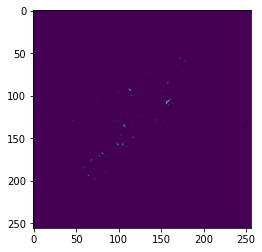

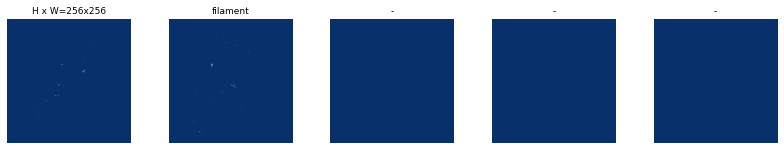

classes : [1]


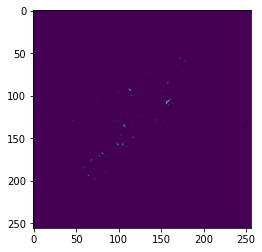

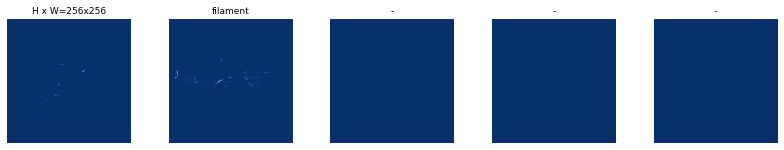

classes : [1]


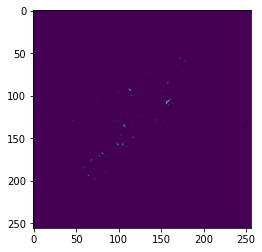

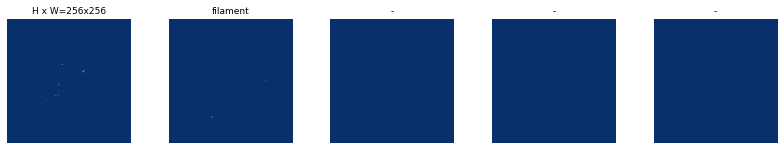

classes : [1]


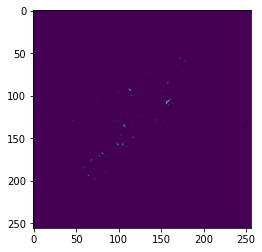

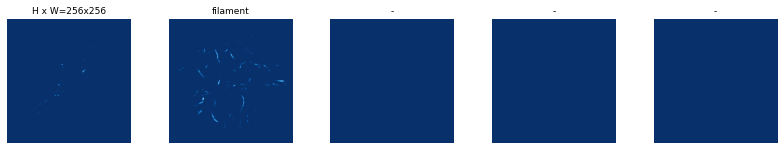

In [158]:
# Load and display random samples
print (dataset_train.image_ids)
image_ids = np.random.choice(dataset_train.image_ids, 4)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    print('classes', ':' , class_ids)
    plt.imshow (image)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

In [161]:
# Create model in training mode
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)

In [160]:
# Which weights to start with?
init_with = "coco"  # imagenet, coco, or last

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    # See README for instructions to download the COCO weights
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model.load_weights(model.find_last(), by_name=True)

ValueError: Layer #2 (named "conv1"), weight <tf.Variable 'conv1_2/kernel:0' shape=(7, 7, 1, 64) dtype=float32> has shape (7, 7, 1, 64), but the saved weight has shape (64, 3, 7, 7).

In [162]:


# Train the head branches
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE, 
            epochs=30, 
            layers='heads')



Num GPUs Available:  1

Starting at epoch 0. LR=0.001

Checkpoint Path: C:\Users\NU\Documents\dana_collaboration_project\logs\shapes20211020T1603\mask_rcnn_shapes_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)
mrcnn_bbox_f

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (3,2) and requested shape (2,2)

In [136]:
class InferenceConfig(ShapesConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
# model_path = os.path.join(ROOT_DIR, ".h5 file name here")
model_path = model.find_last()

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Instructions for updating:
Use fn_output_signature instead
Loading weights from  C:\Users\NU\Documents\dana_collaboration_project\logs\shapes20211020T1334\mask_rcnn_shapes_0030.h5
Re-starting from epoch 30


original_image           shape: (256, 256, 3)         min:    0.00000  max:  255.00000  float64
image_meta               shape: (14,)                 min:    0.00000  max:  256.00000  int32
gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (1, 4)                min:   14.00000  max:  237.00000  int32
gt_mask                  shape: (256, 256, 1)         min:    0.00000  max:  255.00000  uint8
(256, 256)   (256, 256)   (256, 256)
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0

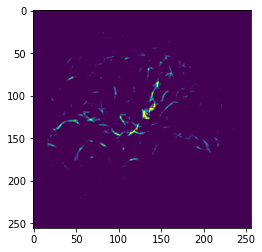

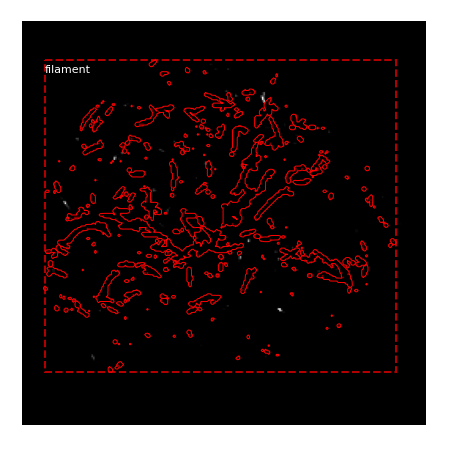

In [137]:
# Test on a random image
image_id = random.choice(dataset_val.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, inference_config, 
                           image_id)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)
data = np.where (original_image == 1)
alpha = 0.6
color = [0] * 3
arr = original_image[:, :, 0] * (1 - alpha) + alpha * color[0] * 255
arr2 = original_image[:, :, 0]
mask =  gt_mask[:,:,0]
print (arr.shape, ' ', arr2.shape, ' ', mask.shape)    
#for c in range(3):
    
    #original_image[:, :, c] = np.where(original_image[:,:,0]== 1,
    #                          original_image[:, :, c] *
    #                          (1 - alpha) + alpha * color[c] * 255,
    #                           original_image[:, :, c])
#print (original_image.shape)

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
print (original_image)
plt.imshow (original_image / 255.0)
plt.savefig ('file_saved.jpg')
plt.imshow (gt_mask / 255.0)
plt.savefig ('file_mask.jpg')
visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset_train.class_names, figsize=(8, 8))

#image_d = Image.fromarray (original_image.astype('uint8'))
#newSize = (256,256)
#image_p = image_d.resize(newSize)
#jpg_image = 'file_saved.jpg'
#print (jpg_image)
#image_p = image_p.convert ('RGB')
#image_p.save (jpg_image)
#plt.figure()
#f, axarr = plt.subplots(2,1) 
#axarr[0].imshow(original_image)


In [ ]:
import cv2
import numpy as np
import math

img = cv2.imread('C:/Users/NU/Documents/dana_collaboration_project/file_saved.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape

#####################
# Vertical wave

img_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = int(25.0 * math.sin(2 * 3.14 * i / 180))
        offset_y = 0
        if j+offset_x < rows:
            img_output[i,j] = img[i,(j+offset_x)%cols]
        else:
            img_output[i,j] = 0

cv2.imshow('Input', img)
cv2.imshow('Vertical wave', img_output)

#####################
# Horizontal wave

img_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = 0
        offset_y = int(16.0 * math.sin(2 * 3.14 * j / 150))
        if i+offset_y < rows:
            img_output[i,j] = img[(i+offset_y)%rows,j]
        else:
            img_output[i,j] = 0

cv2.imshow('Horizontal wave', img_output)

#####################
# Both horizontal and vertical 

img_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = int(20.0 * math.sin(2 * 3.14 * i / 150))
        offset_y = int(20.0 * math.cos(2 * 3.14 * j / 150))
        if i+offset_y < rows and j+offset_x < cols:
            img_output[i,j] = img[(i+offset_y)%rows,(j+offset_x)%cols]
        else:
            img_output[i,j] = 0

cv2.imshow('Multidirectional wave', img_output)

#####################
# Concave effect

img_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = int(128.0 * math.sin(2 * 3.14 * i / (2*cols)))
        offset_y = 0
        if j+offset_x < cols:
            img_output[i,j] = img[i,(j+offset_x)%cols]
        else:
            img_output[i,j] = 0

cv2.imshow('Concave', img_output)


In [ ]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

(256, 256, 3)
Processing 1 images
image                    shape: (256, 256, 3)         min:   34.19777  max:  255.37421  float32
molded_images            shape: (1, 256, 256, 3)      min:  -89.50223  max:  151.47421  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  256.00000  int32
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


Text(0.5, 1.0, 'Result 1')

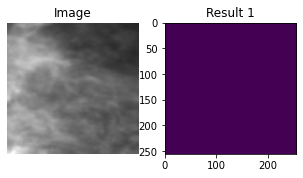

In [138]:
file = 'LMC_gal_mom0_vlsr90_planckprojected_smallmap.fits'
dd=fits.open(file)
map = dd[0].data
image_d = Image.fromarray((map / map.max()) * 255)
newSize = (256,256)
image_p = image_d.resize(newSize)

#for image_id in dataset_val.image_ids:
#    original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
#        modellib.load_image_gt(dataset_val, inference_config, 
#                               image_id)
#    break
#    print (original_image.shape)
      
m = np.stack((image_p,) * 3, axis=-1)
print (m.shape)
results = model.detect([m], verbose = 1)
r = results[0]
top_mask1 = r['masks'][:,:,0]
#top_mask2 = r['masks'][:,:,1]
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(131)
ax1.imshow(image_p, interpolation='none')
ax1.set_title('Image')
plt.axis('off')
ax2 = fig.add_subplot(132)
ax2.imshow(top_mask1, interpolation='none')
ax2.set_title('Result 1')
#ax2 = fig.add_subplot(133)
#ax2.imshow(top_mask2, interpolation='none')
#ax2.set_title('Result 2')
#plt.imshow(top_mask1,  interpolation='none')
#ax4.set_title('Our method')


Processing 1 images
image                    shape: (256, 256, 3)         min:    0.00000  max:  255.00000  float64
molded_images            shape: (1, 256, 256, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  256.00000  int32
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32
original_image           shape: (256, 256, 3)         min:    0.00000  max:  255.00000  float64
image_meta               shape: (14,)                 min:    0.00000  max:  256.00000  int32
gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (1, 4)                min:   35.00000  max:  234.00000  int32
gt_mask                  shape: (256, 256, 1)         min:    0.00000  max:  255.00000  uint8
Processing 1 images
image                    shape: (256, 256, 3)         min:    0.00000  max:  255.00000  float64
molded_ima

original_image           shape: (256, 256, 3)         min:    0.00000  max:  255.00000  float64
image_meta               shape: (14,)                 min:    0.00000  max:  256.00000  int32
gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (1, 4)                min:   44.00000  max:  235.00000  int32
gt_mask                  shape: (256, 256, 1)         min:    0.00000  max:  255.00000  uint8
Processing 1 images
image                    shape: (256, 256, 3)         min:    0.00000  max:  255.00000  float64
molded_images            shape: (1, 256, 256, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  256.00000  int32
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32
original_image           shape: (256, 256, 3)         min:    0.00000  max:  255.00000  float64
image_meta               shape

original_image           shape: (256, 256, 3)         min:    0.00000  max:  255.00000  float64
image_meta               shape: (14,)                 min:    0.00000  max:  256.00000  int32
gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (1, 4)                min:   20.00000  max:  235.00000  int32
gt_mask                  shape: (256, 256, 1)         min:    0.00000  max:  255.00000  uint8
Processing 1 images
image                    shape: (256, 256, 3)         min:    0.00000  max:  255.00000  float64
molded_images            shape: (1, 256, 256, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  256.00000  int32
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32
original_image           shape: (256, 256, 3)         min:    0.00000  max:  255.00000  float64
image_meta               shape

original_image           shape: (256, 256, 3)         min:    0.00000  max:  255.00000  float64
image_meta               shape: (14,)                 min:    0.00000  max:  256.00000  int32
gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (1, 4)                min:   62.00000  max:  112.00000  int32
gt_mask                  shape: (256, 256, 1)         min:    0.00000  max:  255.00000  uint8
Processing 1 images
image                    shape: (256, 256, 3)         min:    0.00000  max:  255.00000  float64
molded_images            shape: (1, 256, 256, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  256.00000  int32
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


'    \nax1 = fig.add_subplot(131)\nax1.imshow(original_image[:,:,0], interpolation=\'none\')\nax1.set_title(\'Image\')\nplt.axis(\'off\')\nax2 = fig.add_subplot(132)\nax2.imshow(top_mask, interpolation=\'none\')\nax2.set_title(\'Our method\')\nplt.axis(\'off\')\nax3 = fig.add_subplot(133)\nax3.imshow(mask, interpolation=\'none\')\nax3.set_title(\'RHT\')\nplt.axis(\'off\')\n\n#plt.savefig("test.png", bbox_inches=\'tight\')\n\n#axs[0].imshow (original_image[:,:,0])\n#axs[1].imshow (top_mask)\n\n#visualize.display_instances(original_image, r[\'rois\'], r[\'masks\'], r[\'class_ids\'], \n#                            dataset_val.class_names, r[\'scores\'], ax=get_ax())\n'

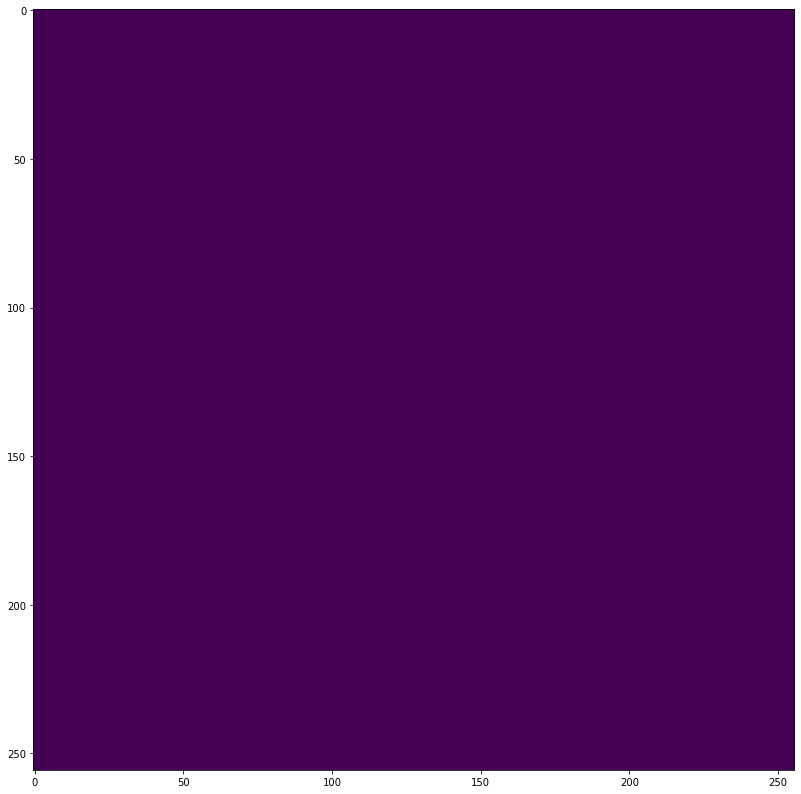

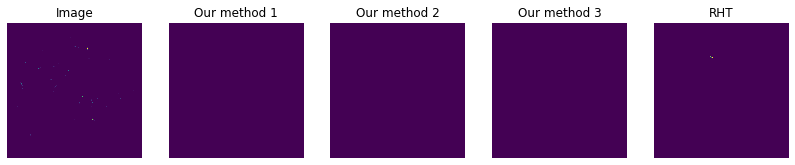

In [141]:
#from tensorflow.compat.v1 import ConfigProto
#from tensorflow.compat.v1 import InteractiveSession

#config = ConfigProto()
#config.gpu_options.allow_growth = True
#session = InteractiveSession(config=config)


#plt.imshow (top_mask)
file = 'Ilmc_res15.fits'
dd=fits.open(file)
map = dd[0].data
results = model.detect([original_image], verbose=1)
r = results[0]
top_mask1 = np.zeros ((256,256))
top_mask1 = r['masks'][:,:,0]
fig = plt.figure(figsize = (14,14))

plt.imshow(top_mask1, interpolation='none')
#ax4.set_title('Our method')


fig = plt.figure(figsize = (14,14)) # create a 5 x 5 figure 
for image_id in dataset_val.image_ids:
    original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_val, inference_config, 
                               image_id)
    log("original_image", original_image)
    log("image_meta", image_meta)
    log("gt_class_id", gt_class_id)
    log("gt_bbox", gt_bbox)
    log("gt_mask", gt_mask)
    data = np.where (original_image == 1)
    alpha = 0.6
    color = [0] * 3
    arr = original_image[:, :, 0] * (1 - alpha) + alpha * color[0] * 255
    arr2 = original_image[:, :, 0]
    mask =  gt_mask[:,:,0]
    results = model.detect([original_image], verbose=1)
    r = results[0]
    #print (r['masks'].shape)
    top_mask1 = np.zeros ((256,256))
    top_mask2 = np.zeros ((256,256))
    top_mask3 = np.zeros ((256,256))
    if (r['masks'].shape[-1] > 0):
        if (r['masks'].shape[-1] >= 1):
            top_mask1 = r['masks'][:,:,0]
        if (r['masks'].shape[-1] >= 2):    
            top_mask2 = r['masks'][:,:,1]
        if (r['masks'].shape[-1] >= 3):
            top_mask3 = r['masks'][:,:,2]
        
    ax1 = fig.add_subplot(151)
    ax1.imshow(original_image[:,:,0], interpolation='none')
    ax1.set_title('Image')
    plt.axis('off')
    ax2 = fig.add_subplot(152)
    ax2.imshow(top_mask1, interpolation='none')
    ax2.set_title('Our method 1')
    plt.axis('off')
    ax3 = fig.add_subplot(153)
    ax3.imshow(top_mask2, interpolation='none')
    ax3.set_title('Our method 2')
    plt.axis('off')
    
    ax4 = fig.add_subplot(154)
    ax4.imshow(top_mask2, interpolation='none')
    ax4.set_title('Our method 3')
    
    plt.axis('off')
    ax5 = fig.add_subplot(155)
    ax5.imshow(mask, interpolation='none')
    ax5.set_title('RHT')
    plt.axis('off')
    filename = 'fils/nn_filaments_top4' + str (image_id) + '.png'
    plt.savefig(filename)
'''    
ax1 = fig.add_subplot(131)
ax1.imshow(original_image[:,:,0], interpolation='none')
ax1.set_title('Image')
plt.axis('off')
ax2 = fig.add_subplot(132)
ax2.imshow(top_mask, interpolation='none')
ax2.set_title('Our method')
plt.axis('off')
ax3 = fig.add_subplot(133)
ax3.imshow(mask, interpolation='none')
ax3.set_title('RHT')
plt.axis('off')

#plt.savefig("test.png", bbox_inches='tight')

#axs[0].imshow (original_image[:,:,0])
#axs[1].imshow (top_mask)

#visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
#                            dataset_val.class_names, r['scores'], ax=get_ax())
'''

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
mAP:  0.0


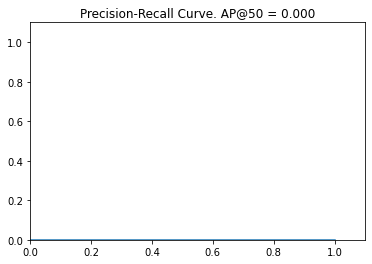

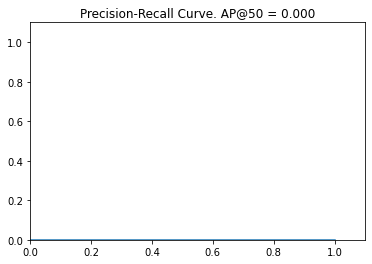

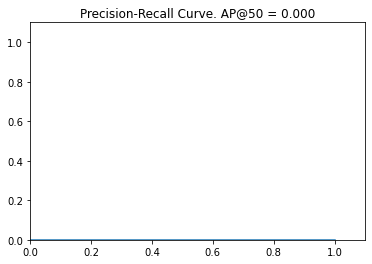

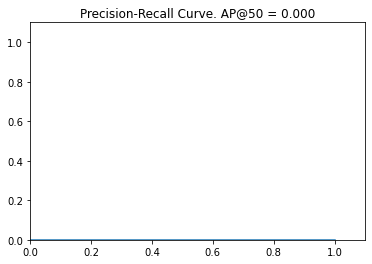

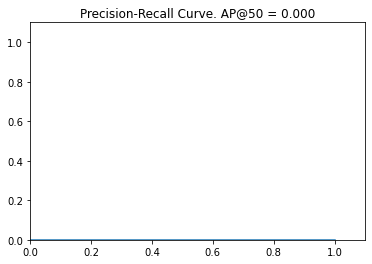

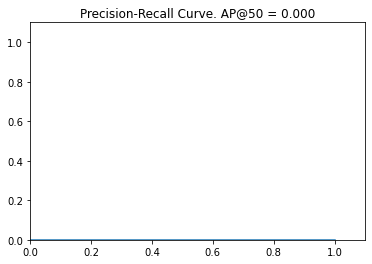

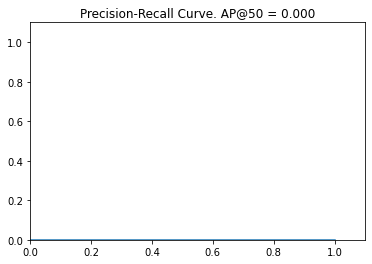

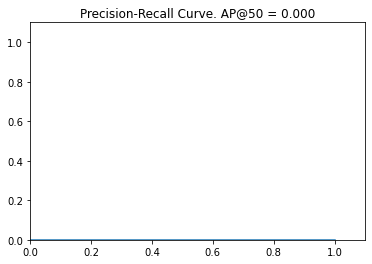

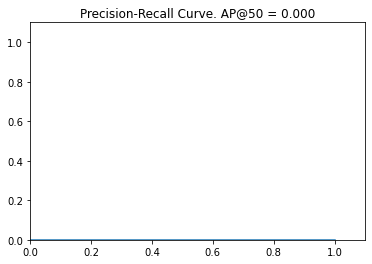

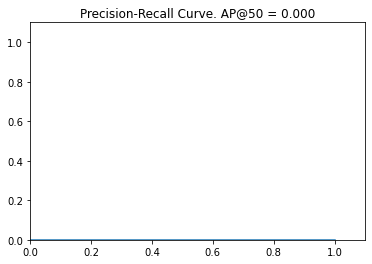

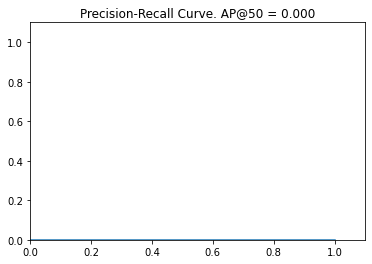

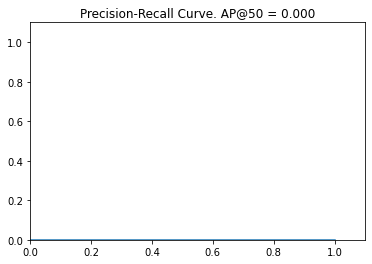

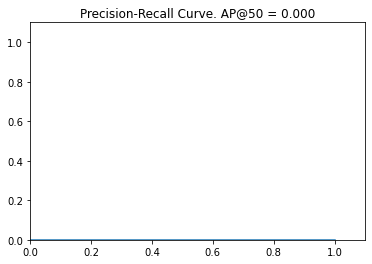

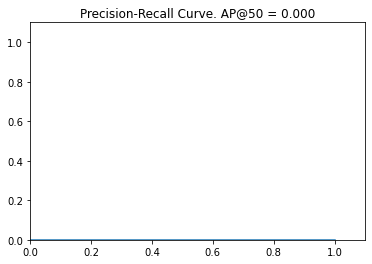

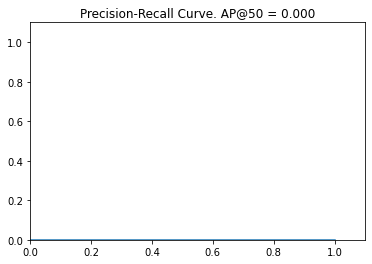

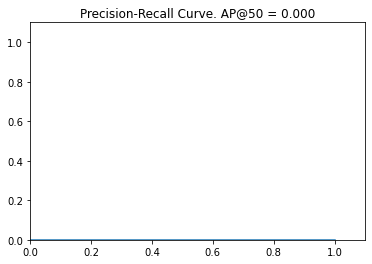

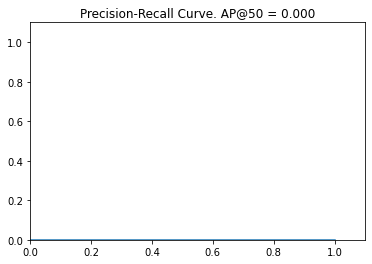

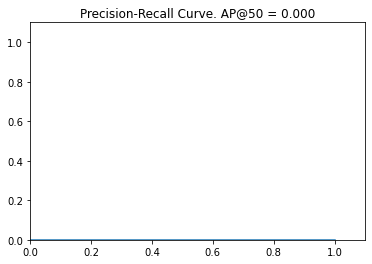

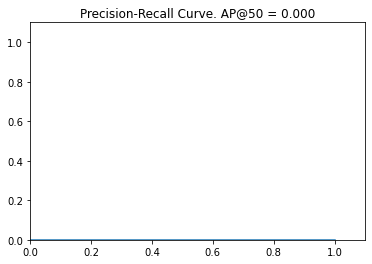

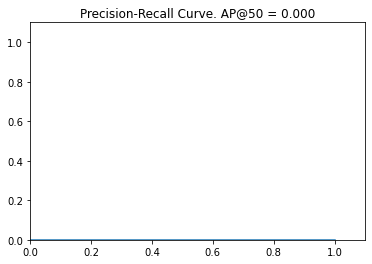

In [139]:
# Compute VOC-Style mAP @ IoU=0.5
# Running on 10 images. Increase for better accuracy.
image_ids = np.random.choice(dataset_val.image_ids, 20)
APs = []
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_val, inference_config,
                               image_id)
    a = modellib.mold_image(image, inference_config)
    #print (a.shape, ' ', np.expand_dims (a,0).shape)
    molded_images = np.expand_dims(modellib.mold_image(image, inference_config), 0)
    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                         r["rois"], r["class_ids"], r["scores"], r['masks'])
    visualize.plot_precision_recall (AP,precisions,recalls)
    APs.append(AP)
print (APs)
print("mAP: ", np.mean(APs))